In [1]:
import quadrature as quad

In [4]:
quad.nPolyTest = 50
quad.nInterTest = 10

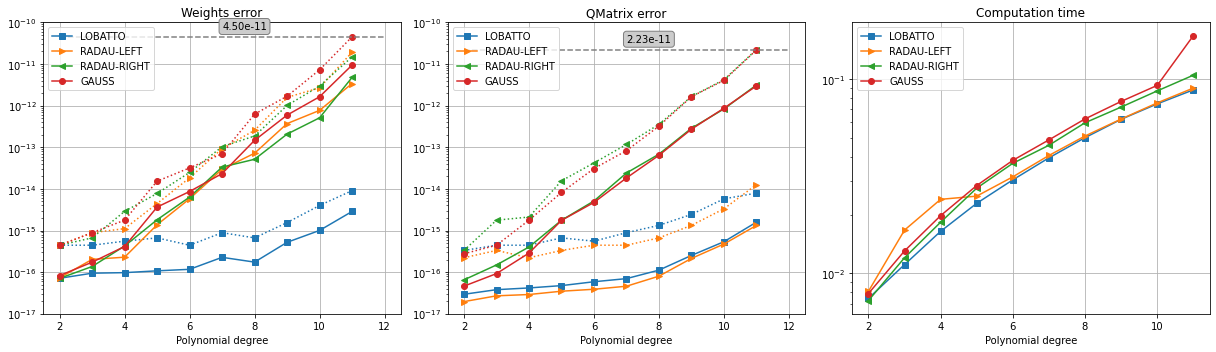

In [5]:
quad.plotQuadErrors('EQUID', 'ORIG')

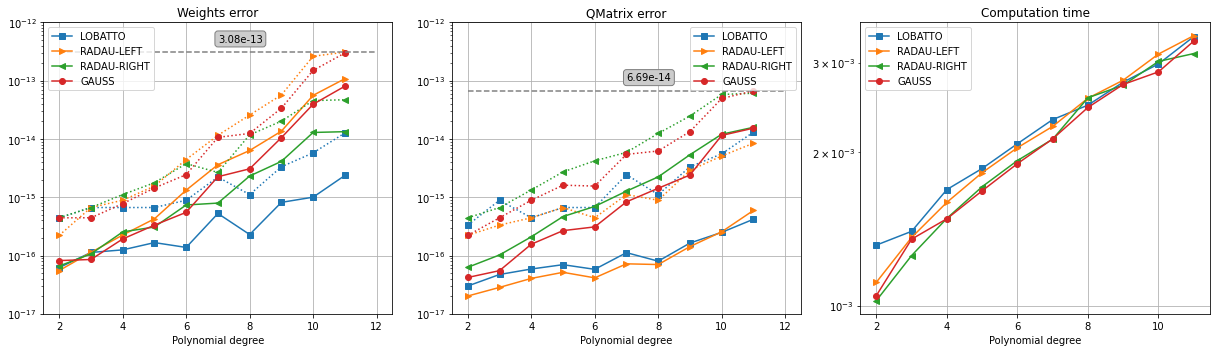

In [6]:
quad.plotQuadErrors('EQUID', 'NEW')

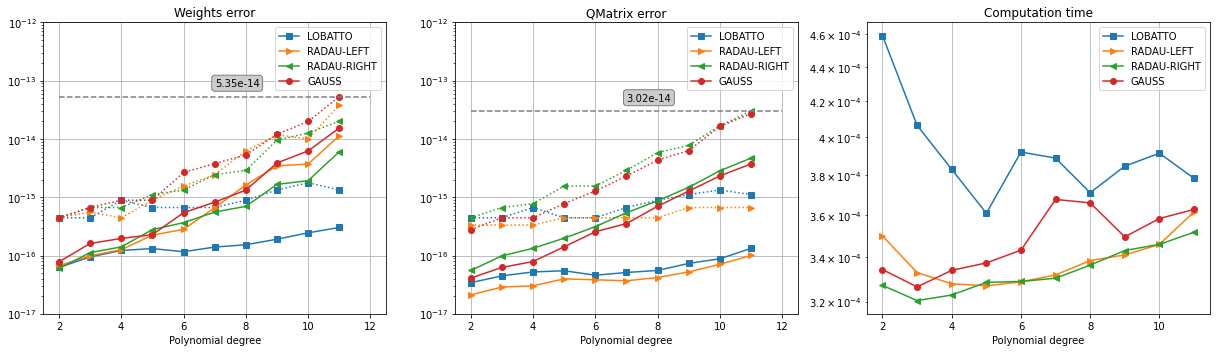

In [7]:
quad.plotQuadErrors('EQUID', 'FEJER')

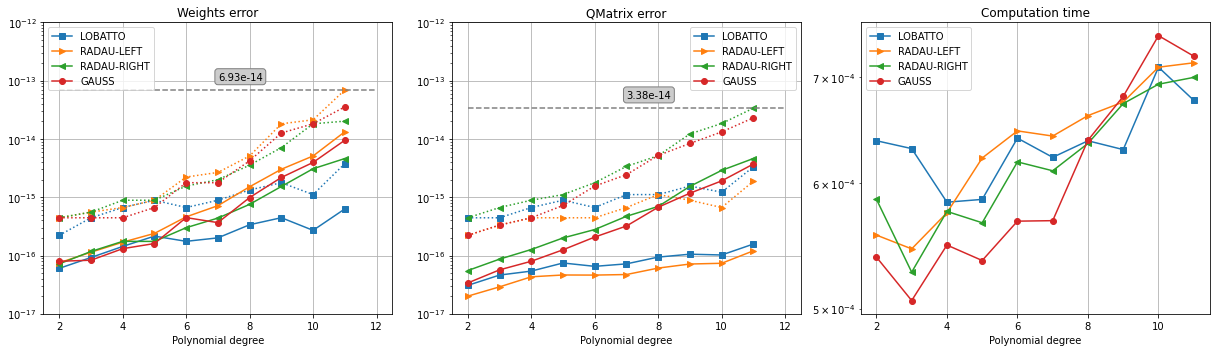

In [8]:
quad.plotQuadErrors('EQUID', 'LEGENDRE_NUMPY')

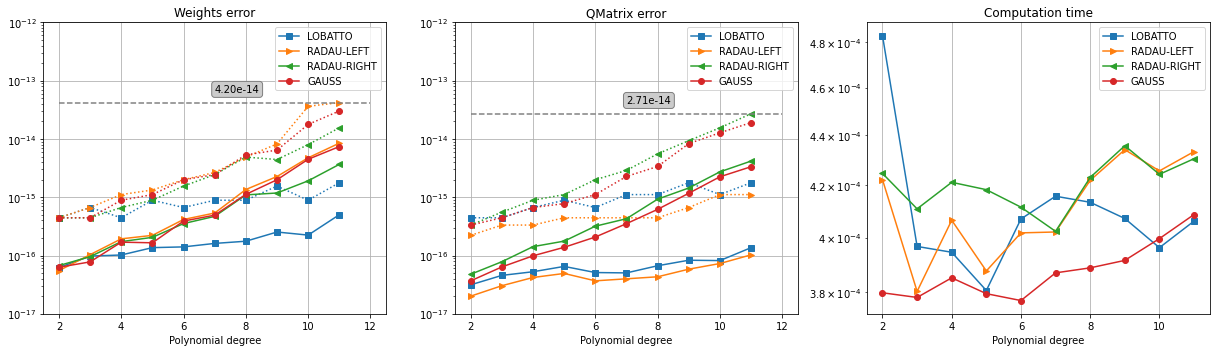

In [9]:
quad.plotQuadErrors('EQUID', 'LEGENDRE_SCIPY')

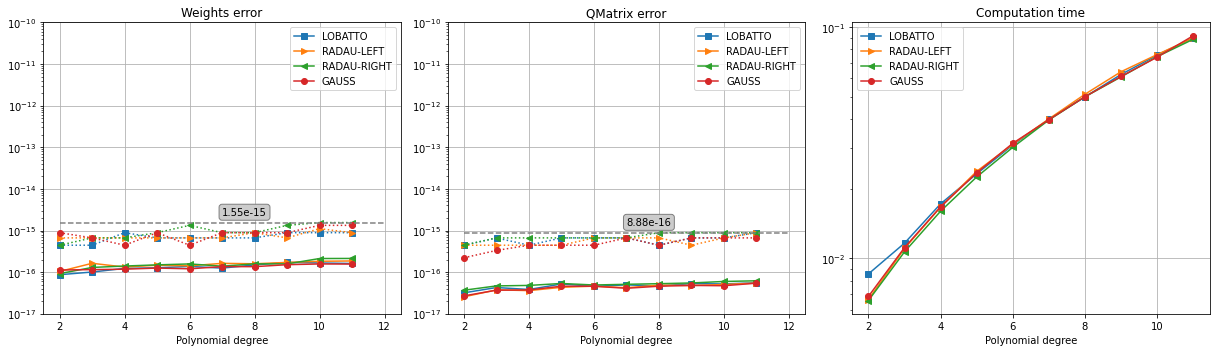

In [10]:
quad.plotQuadErrors('LEGENDRE', 'ORIG')

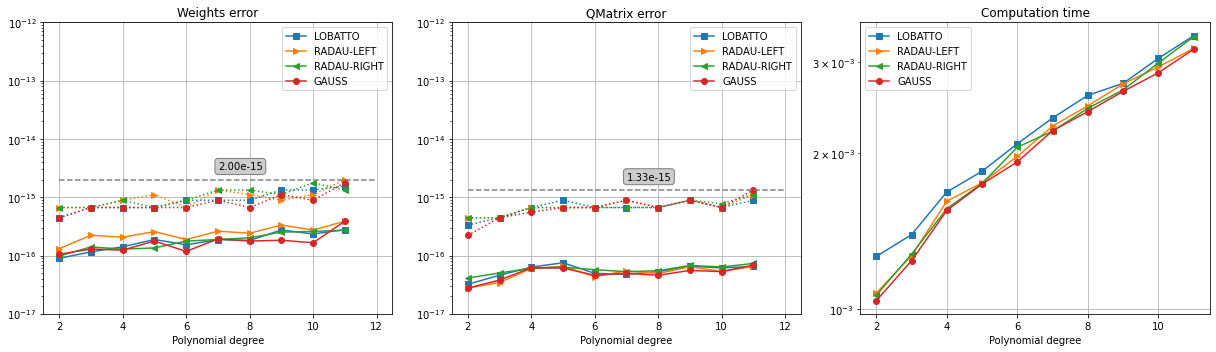

In [11]:
quad.plotQuadErrors('LEGENDRE', 'NEW')

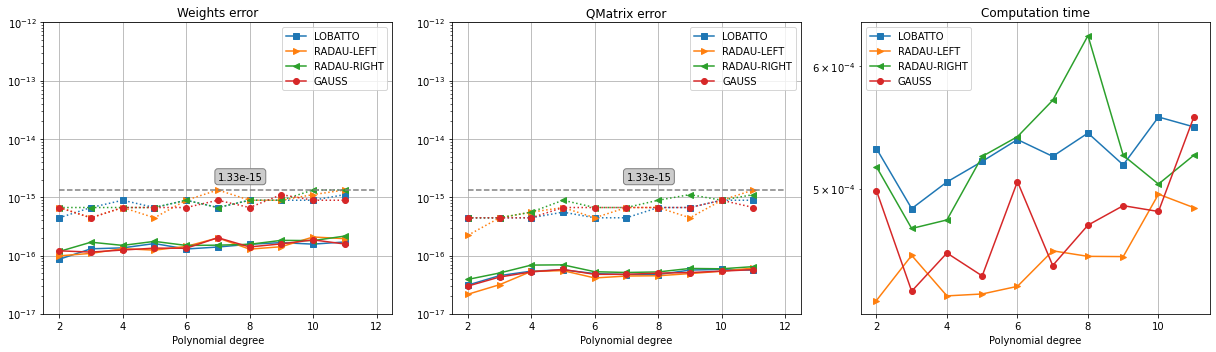

In [13]:
quad.plotQuadErrors('LEGENDRE', 'LEGENDRE_SCIPY')

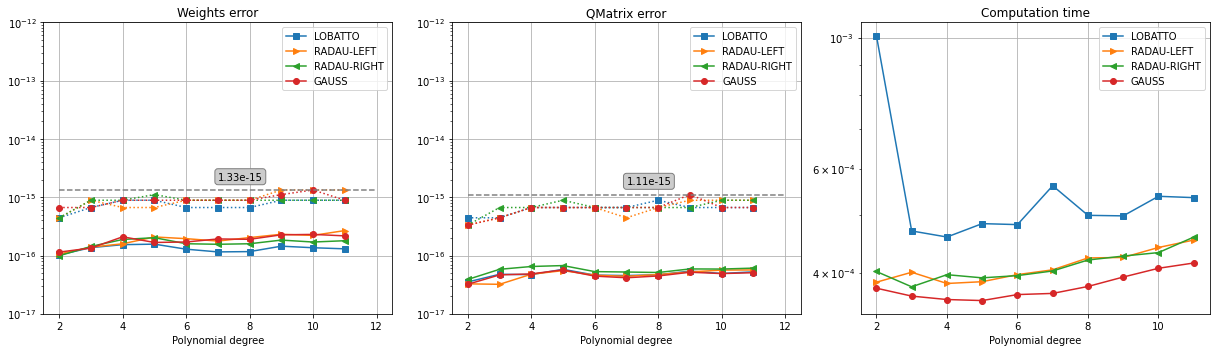

In [14]:
quad.plotQuadErrors('LEGENDRE', 'FEJER')